# Calculating Binomal Distribution Confidence Intervals

In [1]:
import sys

import os.path
from os import path

import requests

import math
#import random
import numpy as np
from numpy import ma
#import pandas as pd
import scipy.stats as ss

#!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D  

%matplotlib inline

#plt.rcParams.update({"text.usetex": True})
#print('matplotlib version {}'.format(matplotlib.__version__))

## 1 Binomial distribution in the limits implied by the normal approximation for large $n$

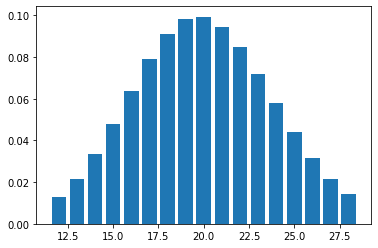

left tail: 0.025328753221397052
total prob: 0.9546510400464305


In [2]:
n = 100
p = 0.2
alpha = 0.05

mu = n*p
stdev = math.sqrt(mu*(1-p))
k  = ss.norm.ppf(1-alpha/2)

lt = int(mu - k*stdev)
rt = int(2*mu-lt)
x  = list(range(lt, rt+1))
y  = ss.binom.pmf(x, n, p)

fig, ax = plt.subplots()
plt.bar(x, y)
plt.show()

prob_lt, prob_rt = ss.binom.cdf(lt, n, p), ss.binom.cdf(rt, n, p)
print('left tail:', prob_lt)
print('total prob:', prob_rt-prob_lt)

## 2 Coverage probability using the normal approximation for large $n$

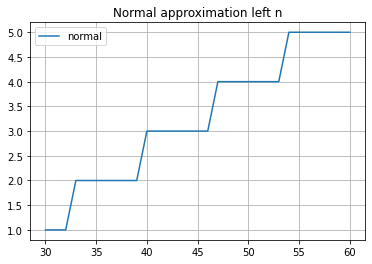

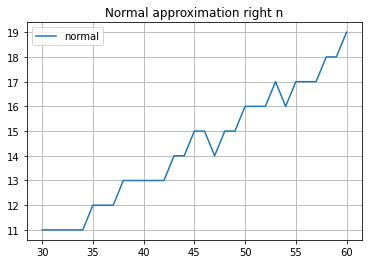

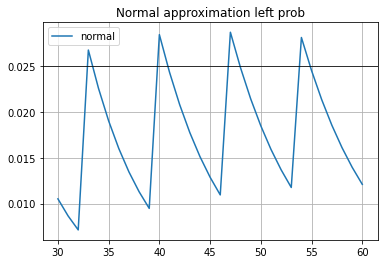

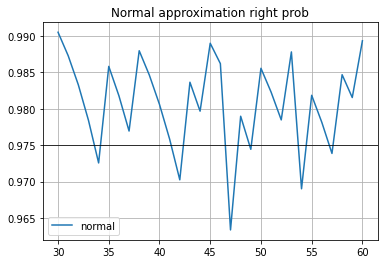

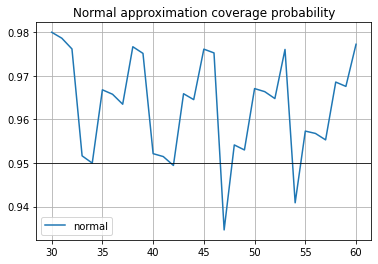

In [3]:
def calc_bin_cov_prob(interval, n, p):
    return ss.binom.cdf(interval[0], n, p), ss.binom.cdf(interval[1], n, p)

def calc_norm_approx_interval(n, p, alpha):
    mu = n*p
    stdev = math.sqrt(mu*(1-p))
    k = ss.norm.ppf(1-alpha/2)
    lt = int(mu - k*stdev)
    rt = int(2*mu-lt)
    return lt, rt

def calc_norm_cov_prob(n, p, alpha):
    return calc_bin_cov_prob(calc_norm_approx_interval(n, p, alpha), n, p)

n_min, n_max = 30, 60
ns = list(range(n_min, n_max+1))

intervals = [calc_norm_approx_interval(i, p, alpha) for i in ns]
lts_n  = [lt for lt, rt in intervals]
rts_n  = [rt for lt, rt in intervals]

probs = [calc_norm_cov_prob(i, p, alpha) for i in ns]
lt_nprobs  = [lt for lt, rt in probs]
rt_nprobs  = [rt for lt, rt in probs]
cov_nprobs = [rt-lt for lt, rt in probs]

def plot_lines(x, lines, labels=['normal', 'binomial'], title=None, hline=None):
    fig, ax = plt.subplots()
    for i, line in enumerate(lines):
        plt.plot(x, line, label=labels[i])
    if hline:
        plt.axhline(hline, color='black', linewidth = 0.75)
    if title:
        plt.title(title)
    plt.grid()
    plt.legend()
    plt.show()

plot_lines(ns, [lts_n], title='Normal approximation left n')
plot_lines(ns, [rts_n], title='Normal approximation right n')

plot_lines(ns, [lt_nprobs], title='Normal approximation left prob', hline=alpha/2)
plot_lines(ns, [rt_nprobs], title='Normal approximation right prob', hline=1-alpha/2)

plot_lines(ns, [cov_nprobs], title='Normal approximation coverage probability', hline=1-alpha)


## 3 Calculting the real binomial confidence interval 

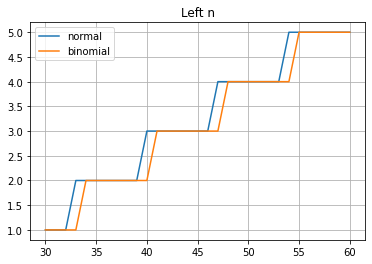

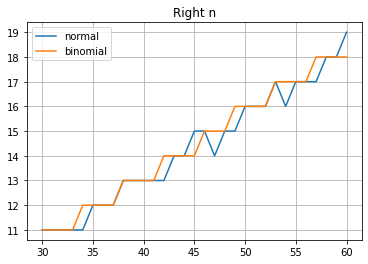

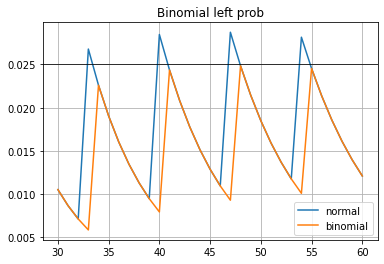

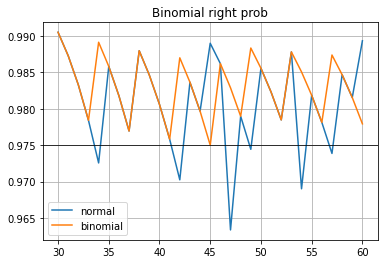

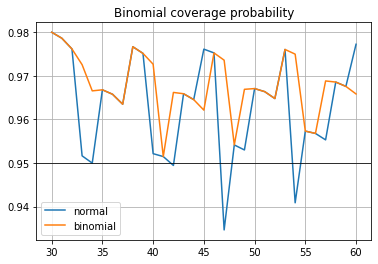

In [4]:
def calc_bin_interval(n, p, alpha):
    cum = 0
    for i in range(n+1):
        cum_new = ss.binom.cdf(i, n, p)
        if cum_new > alpha/2:
            lt = i-1
            break
        cum = cum_new
    rt0 = int(2*n*p - lt + 1)
    cum = ss.binom.cdf(rt0, n, p)
    if cum < 1-alpha/2:
        rt0 += 1
    for i in range(rt0-1, int(n*p), -1):
        cum_new = ss.binom.cdf(i, n, p)
        if cum_new < 1-alpha/2:
            rt = i+1
            break
    return lt, rt

intervals = [calc_bin_interval(i, p, alpha) for i in ns]
lts_b     = [lt for lt, rt in intervals]
rts_b     = [rt for lt, rt in intervals]

probs      = [calc_bin_cov_prob(intervals[i], ni, p) for i, ni in enumerate(ns)]
lt_bprobs  = [lt for lt, rt in probs]
rt_bprobs  = [rt for lt, rt in probs]
cov_bprobs = [rt-lt for lt, rt in probs]

plot_lines(ns, [lts_n, lts_b], title='Left n')
plot_lines(ns, [rts_n, rts_b], title='Right n')

plot_lines(ns, [lt_nprobs, lt_bprobs], title='Binomial left prob', hline=alpha/2)
plot_lines(ns, [rt_nprobs, rt_bprobs], title='Binomial right prob', hline=1-alpha/2)

plot_lines(ns, [cov_nprobs, cov_bprobs], title='Binomial coverage probability', hline=1-alpha)